In [17]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List
from tqdm import tqdm

N = 12
p = 0.15
times = 2000

def generate_data():
    x = np.random.uniform(-1, 1, N)
    y = np.sign(x)
    noise = np.random.choice([-1, 1], size=N, p = [p, 1 - p])
    y *= noise
    return x, y

def decision_stump(x, y):

    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]

    thresholds = [-1]
    for i in range(N-1):
        if x_sorted[i] != x_sorted[i+1]:
            thresholds.append((x_sorted[i] + x_sorted[i+1]) / 2)

    best_ein = float('inf')
    best_s = 1
    best_theta = 1

    total_pos = np.sum(y_sorted == 1)
    tota_neg = N - total_pos

    """
    Situation of missclassified :

    1. s = 1 :  positive points found at the left of the threshold theta, negative points found at the right of the threshold theta
    2. s = -1 : negative points found at the left of the threshold theta, positive points found at the right of the threshold theta
    """

    for s in [-1, 1]:
        pos_left, neg_left = 0, 0
        pos_right, neg_right = total_pos, tota_neg

        length = len(thresholds)

        for i in range(1, length):
            if y_sorted[i-1] == 1:
                pos_left += 1
                pos_right -= 1
            else:
                neg_left += 1
                neg_right -= 1

            if s == -1:
                e_in = float(neg_left + pos_right) / float(N)
            else:
                e_in = float(pos_left + neg_right) / float(N)

            theta = thresholds[i]

            if e_in < best_ein or (e_in == best_ein and s * theta < best_s * best_theta):
                best_ein = e_in
                best_s = s
                best_theta = (thresholds[i] + thresholds[i-1]) / 2

    return best_theta, best_s, best_ein


def decision_stump_random(x, y):

    # randomly generate theta and s
    theta = np.random.uniform(-1, 1)
    s = np.random.choice([-1, 1], size=None)

    missclassification = 0

    for i in range(N):
        if(y[i] != np.sign(x[i] - theta) * s):
            missclassification += 1

    e_in = missclassification / N

    return theta, s, e_in


def calculate_eout(theta, s, p):
    return 0.5 - s * (0.5 - p) + s * (0.5 - p) * (abs(theta))


def experiment():
    e_in_list = []
    e_out_list = []
    for _ in tqdm(range(times), desc="Running decision stump"):
        x, y = generate_data()

        theta, s, ein = decision_stump(x, y)
        eout = calculate_eout(theta, s, p)

        e_in_list.append(ein)
        e_out_list.append(eout)

        # print(f"Ein: {ein:.6f}, Eout: {eout:.6f}")

    return e_in_list, e_out_list


def experiment_random():
    e_in_list = []
    e_out_list = []
    for _ in tqdm(range(times), desc="Running random decision stump"):
        x, y = generate_data()

        theta, s, ein = decision_stump_random(x, y)
        eout = calculate_eout(theta, s, p)

        e_in_list.append(ein)
        e_out_list.append(eout)

        # print(f"Ein: {ein:.6f}, Eout: {eout:.6f}")

    return e_in_list, e_out_list


def plot(ein_list, eout_list, experiment):
    plt.figure(figsize=(10, 6))
    plt.scatter(ein_list, eout_list, alpha=0.5)
    plt.xlabel('Ein')
    plt.ylabel('Eout')
    plt.title(f'{experiment}')
    plt.grid(True)
    plt.show()



Running decision stump: 100%|██████████| 2000/2000 [00:00<00:00, 10840.60it/s]


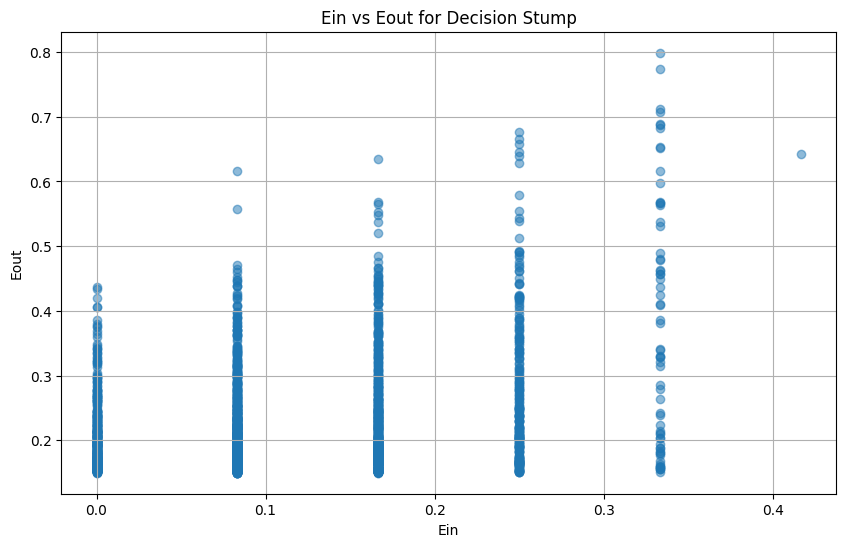


Median of Eout(g) - Ein(g): -0.111642


In [18]:
if __name__ == "__main__":
    e_in_list, e_out_list = experiment()
    plot(e_in_list, e_out_list, "Ein vs Eout for Decision Stump")

    e_in_array = np.array(e_in_list)
    e_out_array = np.array(e_out_list)

    difference = e_in_array - e_out_array
    median_difference = np.median(difference)

    print(f"\nMedian of Eout(g) - Ein(g): {median_difference:.6f}")

Running random decision stump: 100%|██████████| 2000/2000 [00:00<00:00, 10296.28it/s]


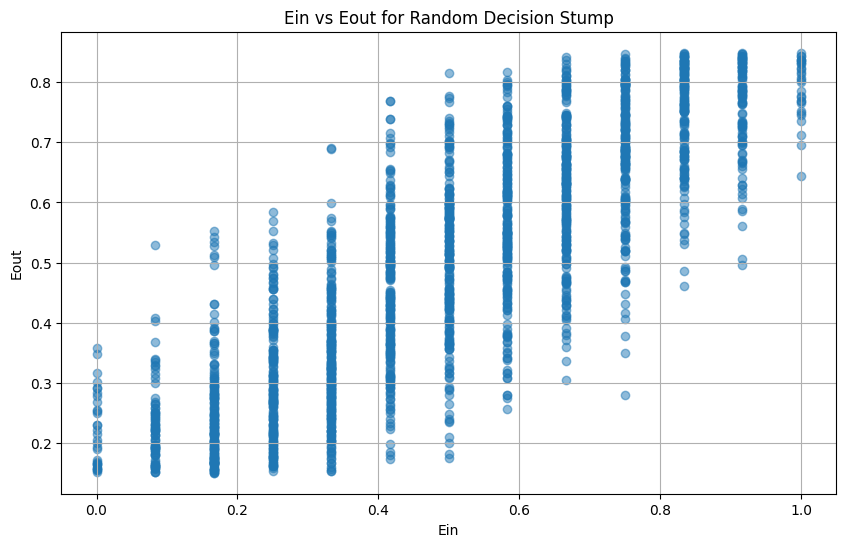

Median of Eout(g) - Ein(g): 0.006499


In [19]:
    e_in_list, e_out_list = experiment_random()
    plot(e_in_list, e_out_list, "Ein vs Eout for Random Decision Stump")

    e_in_array = np.array(e_in_list)
    e_out_array = np.array(e_out_list)

    difference = e_in_array - e_out_array
    median_difference = np.median(difference)

    print(f"Median of Eout(g) - Ein(g): {median_difference:.6f}")